#Mounting Google Drive

In [ ]:
'''
Mounting => Before your computer can use any kind of storage device (such as hard drive, Google drive), you or your operating system must make it
accessible through the computer’s file system. This process is called mounting. You can only access files on mounted media.
In Computers, to mount is to make a group of files in a file system structure accessible to a user or user group. In some usages, it means to make a
device physically accessible. Mounting a file system (Google drive) attaches that Google drive to a directory (mount  point) and makes it available to the
system. In simple words, with mounting a Google drive, user and operating system can access to all the files present in the Google drive. A mounted disk 
(a mounted drive) is available to the operating system as a file system, for reading, writing, or both.
'''
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing the required libraries

In [ ]:
'''
Python library = python library is the collection of modules(= python files) and this python library is the reusable(=able to use again) chunk(= part, section
, block) of code we want to include in our python programs or projects to make the implementation easier and faster.

os module in python provides functions for interacting with the operating system. os module in Python provides functions for creating and removing a 
directory(folder), fetching its contents, os module used for changing and identifying the current directory, etc. Basically os module allows source code
to communicate (interact) with operating system.

Pickle in Python is primarily used in serializing and deserializing a Python object structure. In other words, it's the process of converting a python
object into a byte stream to store it in a file/database. Basically pickle library is used to dump (store) all the files of a directory (folder) into 
single combined file (pickle(.pkz) file) for easy fetching and fast retrieval of data. pickle.dump() is used to create a pickle file, it is used to dump
(store) data in a pickle file. pickle.load() is used to load(= start, activate) pickle file

Torch (or PyTorch) is an open-source library for machine learning and deep learning. Torch library provides a wide range of algorithms for machine learning and 
deep learning. The core package of Torch is “torch”, torch package provides a flexible (= adaptable, adjustable, alterable, changeable) N-dimensional array or 
Tensor, which supports basic routines for indexing, slicing, transposing, type-casting, resizing, sharing storage and cloning. The Tensor also supports 
mathematical operations like max, min, sum, statistical distributions like uniform, normal and multinomial, and BLAS operations like dot product, matrix-vector 
multiplication, matrix-matrix multiplication, matrix-vector product and matrix product. The torch package also simplifies object oriented programming and 
serialization by providing various convenience functions which are used throughout its packages

torch.nn => https://www.javatpoint.com/torch_nn-in-pytorch#:~:text=PyTorch%20provides%20the%20torch.,any%20features%20from%20these%20models.
PyTorch provides the torch.nn module to help us in creating and training the neural network. torch.nn provide us many classes and modules to implement and train 
the neural network.

torch.utils.data.Dataset is an abstract class representing a dataset. custom dataset (torch dataset) should inherit Dataset and apply the following methods:
(1)__init__ , (2)__len__ , (3)__getitem__ , and (4) an optional argument transform. Dataset stores the samples and their corresponding labels

torch.utils.data.DataLoader wraps an iterable around the Dataset to enable easy access to the samples

torch.optim => torch.optim is a package(= collection of modules(= python files)) implementing(= applying, using, utilizing) various optimization algorithms.

numpy module allows us to work with numerical data. numpy provides an object called numpy array. numpy supports large multi-dimensional arrays & matrices. 
Basically numpy is a python library used for working with arrays. numpy used for arithmetic operations, statistical operations, bitwise operations, copying 
and viewing arrays, stacking, matrix operations, linear algebra, mathematical operations, searching, sorting, and counting.

Matplotlib is the most popular plotting(=sketching, drawing, designing, outlining) library for Python. python library = Collection of modules 
(modules = python files). Pyplot is a Matplotlib module which provides a MATLAB-like interface. Each pyplot function makes some change to a figure. For
example, creates a figure, creates a plotting area in a figure, plots some lines in a plotting area,  decorates the plot with labels, etc. The various plots
we can utilize using Pyplot are Line Plot, Histogram, Scatter, 3D Plot, Image, Contour, hexagonal binnning plot and Polar. Can also import as  
"import matplotlib.pyplot as plt"

from sklearn.linear_model import LinearRegression => sklearn.linear_model is a library or package that supports linear regression analyis
                                                     LinearRegression is a module of sklearn.linear_model that implements linear regression algorithm
(Linear regression - https://www.youtube.com/watch?v=iIUq0SqBSH0  -  Linear Regression is a statistical way of measuring the relationship between variables like 
- as time increases so does frequency (as time increases, frequency also increases) or as time increases failure probability increases. Linear Regression 
analysis helps to predict the future. linear regression equation or linear regression formula => y = mx + b , here y - what we are trying to predict(output), 
m - slope or constant, x - input value, b - bias (error of the learning data or training data. error of the data on which the model was trained), to know more 
about bias refer this link - https://www.youtube.com/watch?v=BqzgUnrNhFM ). Linear regression intuition is simple: find the best line that fits a given data set. 

from sklearn.gaussian_process import GaussianProcessRegressor => sklearn.gaussian_process is a library or package that supports gaussian processes
                                                                 GaussianProcessRegressor is a module of sklearn.gaussian_process that implements Gaussian
                                                                 Process Regression.
 (Gaussian Process Regression - )

as keyword is used as alias (AKA, also called as)
'''
import os
import pickle as pkl
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct, RBF, RationalQuadratic

#PHM IEEE Dataset - Sequential(sequence)

Helper Function = A helper function is a function that performs part of the computation (= operation, calculation, estimation, guess) of another function. Helper functions are used to make our programs (= codes) easier to read by giving names to computations. Helper functions also let you reuse computations, just as with functions in general. A helper function is a function we write because we need that particular functionality (= purpose, operation) of a function in multiple places in a code, and because it makes the code more readable. Instead of defining a particular functionality many times, insert(=put, embed) the functionality which we required many times in a helper function, so that we can use that particular functionality as many times we required without defining again

In [ ]:
'''
#Load(= activate, start) data from pickle(.pkz) file. Basically here we are loading a pickle file.

def keyword is used to define (= create) a function or method in python
using def keyword we defined (= created) a function load_data_from_pfile and passed an argument file_path. Argument is the value to be passed in a function. 
Here file_path is the location of all pickle files. i.e. file_path = /content/drive/MyDrive/Colab Notebooks 

with keyword => automatically releases memory after allocation. Whenever we open the file with open() function, it allocates some resources and memory to the 
file. And we should use close() function to release or delete that memory from the file otherwise errors will come. Sometimes we forget to close() the file and 
we couldn’t find that we didn’t closed the file, so even the whole code is correct we might get errors and we may not be able to correct it. So it’s better to 
use “with” keyword along with open() function as “with” keyword automatically releases or deletes memory after process completion

The open() function opens a file in text format by default. To open a file in binary format, add 'b' to the mode parameter. Hence the "rb" mode opens the file 
in binary format for reading, while the "wb" mode opens the file in binary format for writing. (Note: there are 2 basic mode parameters (r = read mode,w = write 
mode)). Unlike text files, binary files are not human-readable

as = The as keyword is used to create an alias (= aka, also known as, also called). In the code, we created an alias pfile when opening the file_path, and now 
we can refer to the file_path (or we can access the file_path) by using pfile instead of file_path.

Basically The pickle(.pkz) file is created using Python pickle and the dump() method and is loaded (=started, activated) using Python pickle and the load() 
method. we imported(=send) pickle module as pkl in the code. Therefore pkl.dump() is used to create pickle(.pkz) file and pkl.load() is used to load(=start, 
activate) pickle file. Here, pfile is the pickle file. Pkl.load(pfile) loads (= starts, activates) the pfile in rb (read binary) mode. We stored the loaded 
pfile in sample_data variable.

return keyword = the return keyword is used to exit (= come out from) a function and return a value. Return sample_data => returns value of sample_data and 
                 exits a function.
'''
def load_data_from_pfile(file_path):  # helper function
    with open(file_path, 'rb') as pfile:
        sample_data = pkl.load(pfile)
    return sample_data

In [ ]:


class PHMTestDataset_Sequential(Dataset):
    """PHM data set where each item is a sequence"""
    def __init__(self, dataset='', seq_len=5):
        """
        dataset_id = index of dataset to read from
        indices = indices from the dataset that need to be included
        seq_len = length of the output sequence
        i.e., return a sequence of length `seq_len` from the dataset as `x` and fault probability of the last frame as `y`
        """
        self.data = load_data_from_pfile(dataset)
        self.seq_len = seq_len
    
    def __len__(self):
        return self.data['x'].shape[0]-self.seq_len+1
    
    def __getitem__(self, i):
        sample = {'x': torch.from_numpy(self.data['x'][i:i+self.seq_len])}
        return sample

#Test data pickle(.pkz) files path

In [ ]:
test_pkzfiles_path = '/content/drive/MyDrive/Colab Notebooks/'

In [ ]:
def conv_bn_relu(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', batch_norm=True):
    conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, dilation=dilation, groups=groups, bias=bias, padding_mode=padding_mode)
    nn.init.xavier_uniform_(conv.weight)
    relu = nn.ReLU()
    if batch_norm:
        return nn.Sequential(
            conv,
            nn.BatchNorm2d(out_channels),
            relu
        )
    else:
        return nn.Sequential(
            conv,
            relu
        )

In [ ]:
class CNN_CWT_Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = conv_bn_relu(2, 16, 3, stride=1, padding=1, bias=True, batch_norm=True)
        self.pool1 = nn.MaxPool2d(2, stride=2)
        self.conv2 = conv_bn_relu(16, 32, 3, stride=1, padding=1, bias=True, batch_norm=True)
        self.pool2 = nn.MaxPool2d(2, stride=2)
        self.conv3 = conv_bn_relu(32, 64, 3, stride=1, padding=1, bias=True, batch_norm=True)
        self.pool3 = nn.MaxPool2d(2, stride=2)
        self.conv4 = conv_bn_relu(64, 128, 3, stride=1, padding=1, bias=True, batch_norm=True)
        self.pool4 = nn.MaxPool2d(2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(8192, 256)
        self.fc2 = nn.Linear(256, 128)
        self.dropout1 = nn.Dropout(p=0.2)

    def forward(self, x):
        # input shape = [Nx2x128x128]
        x = self.conv1(x) # [Nx16x128x128]
        x = self.pool1(x) # [Nx16x64x64]
        x = self.conv2(x) # [Nx32x64x64]
        x = self.pool2(x) # [Nx32x32x32]
        x = self.conv3(x) # [Nx64x32x32]
        x = self.pool3(x) # [Nx64x16x16]
        x = self.conv4(x) # [Nx128x16x16]
        x = self.pool4(x) # [Nx128x8x8]
        x = self.flatten(x) # [Nx8192] {128*8*8=8192} (N => batch size, 128 => no. of channels, 8*8 => height of image*width of image)
        x = self.fc1(x) # [Nx256] 
        # x = self.dropout1(x) # apply dropout (Dropout is much harder to implement in LSTM)
        x = nn.ReLU()(x) # apply ReLU activation
        x = self.fc2(x) # [Nx128]
        x = nn.ReLU()(x) # apply ReLU activation
        return x

In [ ]:
class CNN_LSTM_FP(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = CNN_CWT_Encoder()
        self.lstm1 = nn.LSTM(input_size=128, hidden_size=256, num_layers=2, batch_first=True)
        self.fc = nn.Linear(256, 1)
    
    def forward(self, x):
        # input shape = [N x l x 2 x 128 x 128] Here, N - batch size, l - sequence length (i.e. SEQ_LEN = 5),  2 - no. of channels or no. of filters, 
                                                      # 128 * 128 - height of an image * width of an image
        batch_size, seq_len, C, H, W = x.size()
        x = x.view(batch_size*seq_len, C, H, W) # transform input of shape [N x l x 2 x 128 x 128] into input of shape [(Nxl) x 2 x 128 x 128]. basically,
                                                # converting(= transforming) into sequences. [(Nxl) x 2 x 128 x 128] - transformed input sequence
        x = self.encoder(x) # pass transformed input sequence through CNN Encoder, CNN Encoder converts the image input data sequence of shape 
                            # [(Nxl) x 2 x 128 x 128] into linear vector sequence by flatenning, output feature vector sequence shape = [(Nxl) x 128]
        x = x.view(batch_size, seq_len, -1) # transform encoded feature vector sequence into time distributed(= shared, alloted, assigned) input as required by
                                            # LSTM unit or LSTM cell
        x, _ = self.lstm1(x) # pass transformed encoded feature vector sequence through LSTM unit or LSTM cell, _ variable contains the hidden layers or hidden
                             # states of LSTM, we don't require those hidden layers in our implementation, therefore just stored in _ variable, and if we want
                             # we can initialize(= activate, start) hidden states from _ variable, here hidden states are the array of zeroes
        x = self.fc(x[:,-1,:]) # pass last vector sequence(i.e. output vector sequence of LSTM unit at last time step) through fully connected network layer
        x = nn.Sigmoid()(x)
        return x    

In [ ]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # Declaring a variable "device" which will hold the device(i.e. either GPU or CPU) we are 
                                                                      #training the model on
print(device)
device

cuda:0


device(type='cuda', index=0)

In [ ]:
model = CNN_LSTM_FP().to(device)

#Testing

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/Models/cnn_lstm_model1.pth'))

<All keys matched successfully>

In [ ]:
def model_inference_helper(model, dataloader):
    results = {'predictions':[]}
    model.eval()
    for i, batch in enumerate(dataloader):
        x = batch['x'].to(device, dtype=torch.float)

        with torch.no_grad():
            y_prediction = model(x)

        if y_prediction.size(0)>1:
            results['predictions'] += y_prediction.cpu().squeeze().tolist()
        elif y_prediction.size(0)==1:
            results['predictions'].append(y_prediction.cpu().squeeze().tolist())
    return results

#Bearing1_3

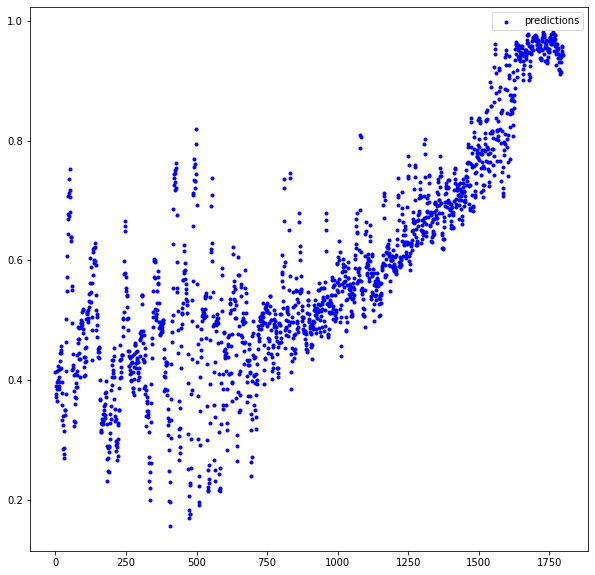

In [ ]:
test_pfile = test_pkzfiles_path+'bearing1_3_test_data.pkz'
test_dataset = PHMTestDataset_Sequential(dataset=test_pfile)

test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=1)

results = model_inference_helper(model, test_dataloader)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.legend()
plt.show()

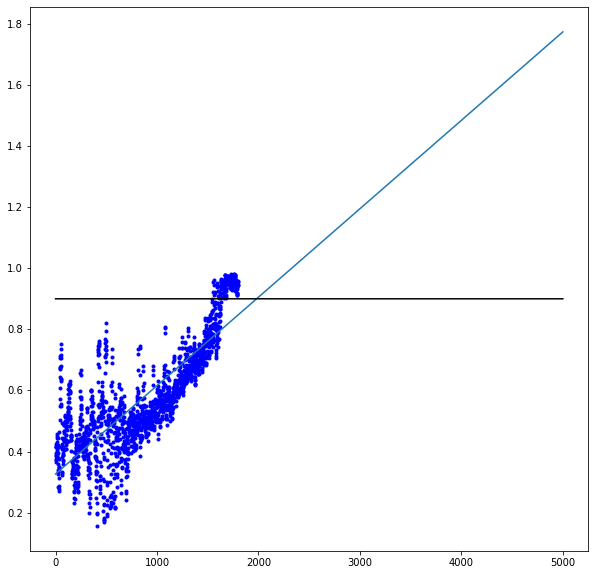

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
reg = LinearRegression().fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = reg.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test)
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

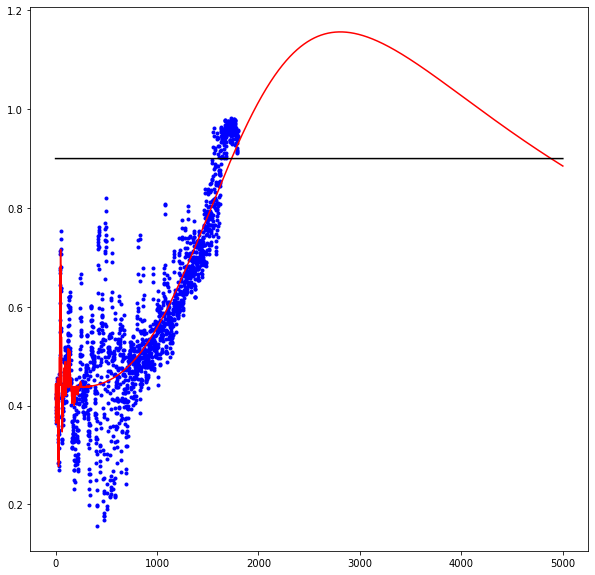

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
gp_kernel = RBF(0.01)+RationalQuadratic(0.1)

gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr.fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = gpr.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test, 'r')
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

#Bearing1_4

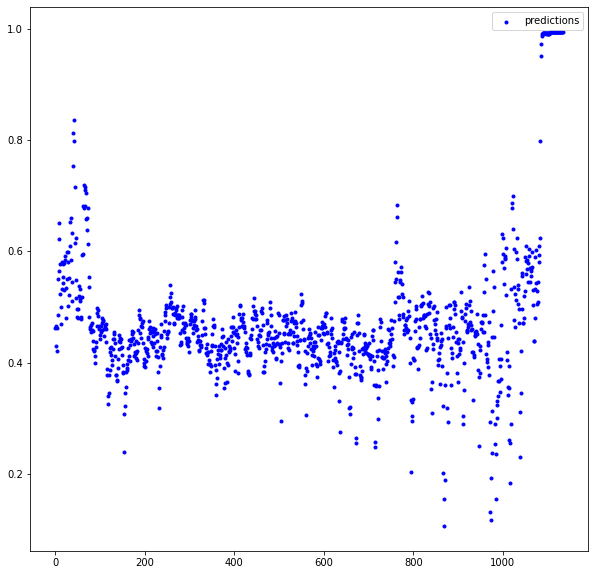

In [ ]:
test_pfile = test_pkzfiles_path+'bearing1_4_test_data.pkz'
test_dataset = PHMTestDataset_Sequential(dataset=test_pfile)

test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=1)

results = model_inference_helper(model, test_dataloader)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.legend()
plt.show()

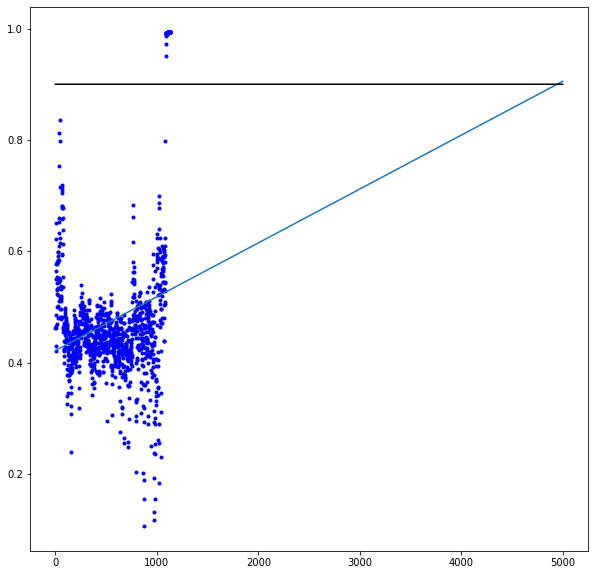

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
reg = LinearRegression().fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = reg.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test)
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

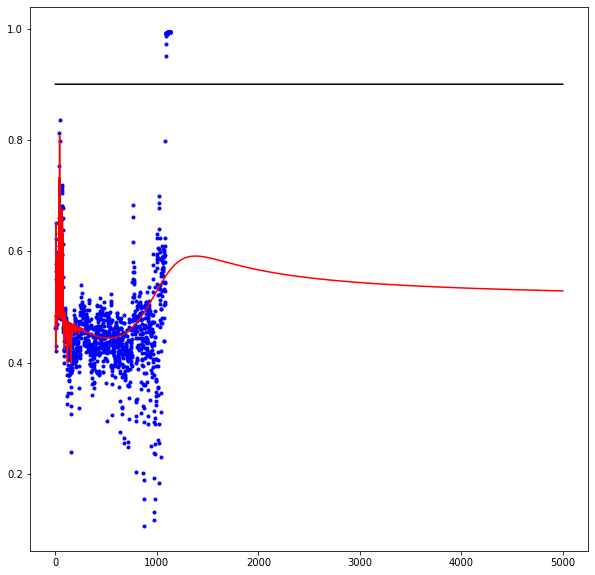

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
gp_kernel = RBF(0.01)+RationalQuadratic(0.1)

gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr.fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = gpr.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test, 'r')
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

#Bearing1_5

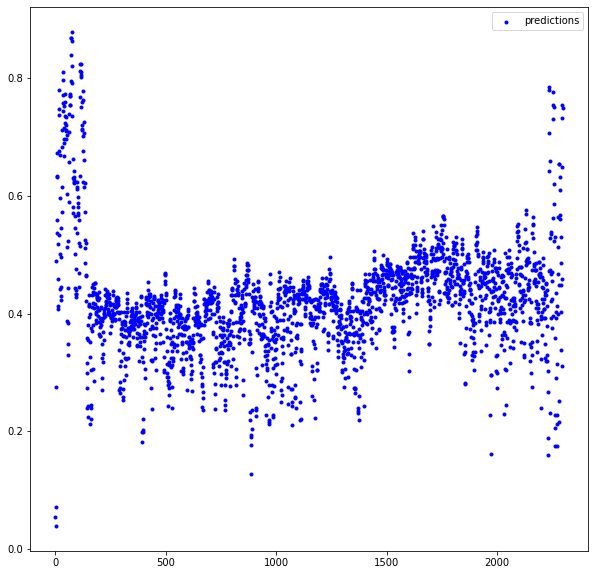

In [ ]:
test_pfile = test_pkzfiles_path+'bearing1_5_test_data.pkz'
test_dataset = PHMTestDataset_Sequential(dataset=test_pfile)

test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=1)

results = model_inference_helper(model, test_dataloader)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.legend()
plt.show()

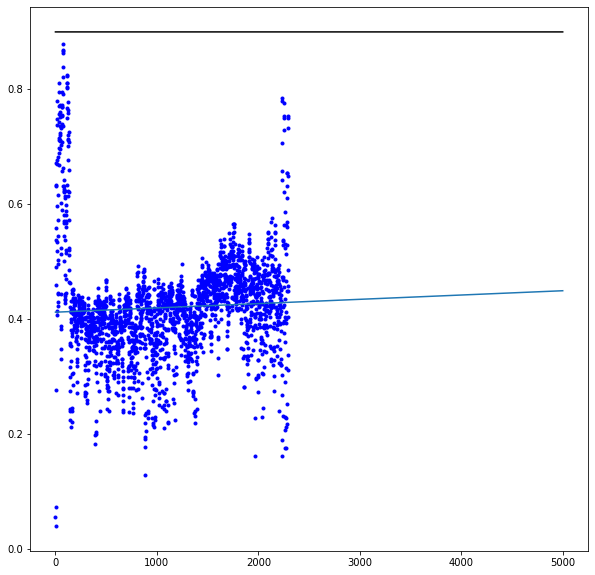

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
reg = LinearRegression().fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = reg.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test)
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

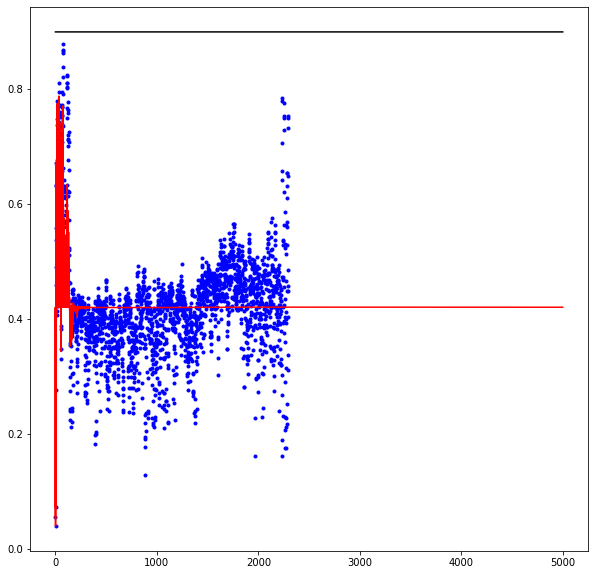

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
gp_kernel = RBF(0.01)+RationalQuadratic(0.1)

gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr.fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = gpr.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test, 'r')
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

#Bearing1_6

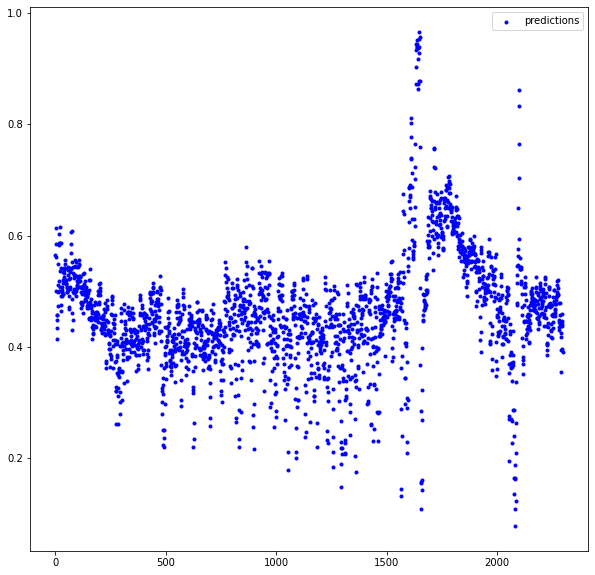

In [ ]:
test_pfile = test_pkzfiles_path+'bearing1_6_test_data.pkz'
test_dataset = PHMTestDataset_Sequential(dataset=test_pfile)

test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=1)

results = model_inference_helper(model, test_dataloader)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.legend()
plt.show()

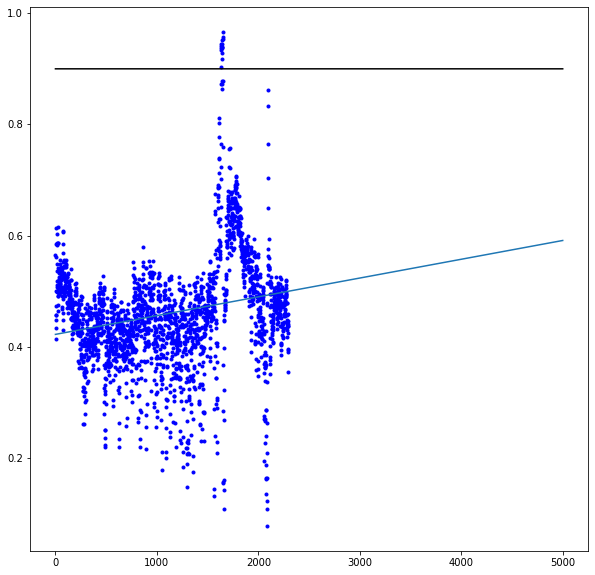

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
reg = LinearRegression().fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = reg.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test)
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

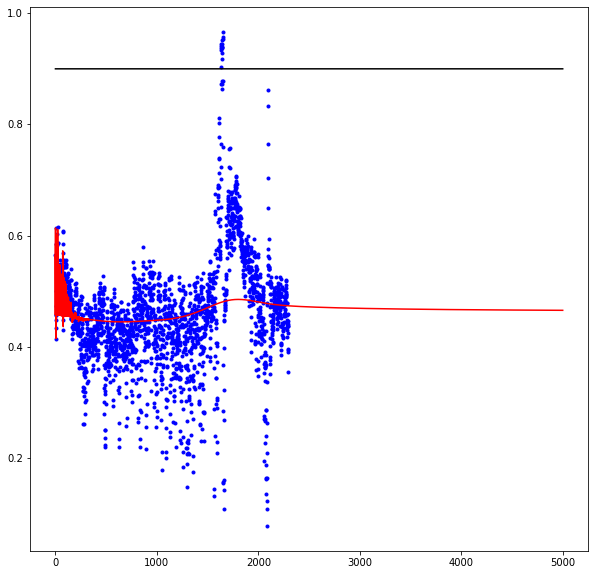

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
gp_kernel = RBF(0.01)+RationalQuadratic(0.1)

gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr.fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = gpr.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test, 'r')
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

#Bearing1_7

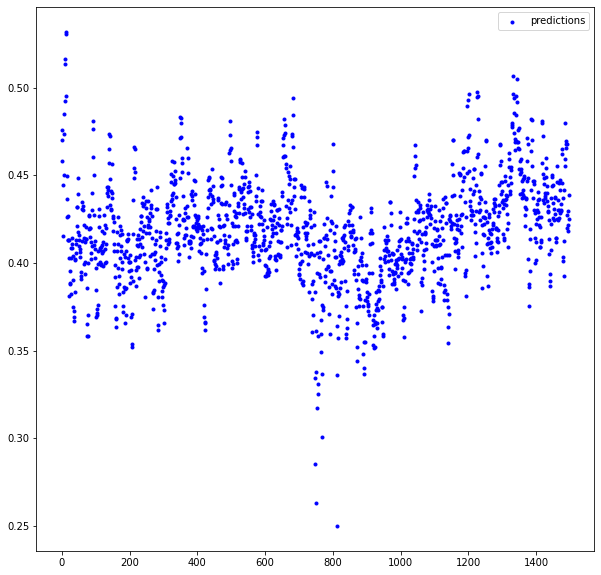

In [ ]:
test_pfile = test_pkzfiles_path+'bearing1_7_test_data.pkz'
test_dataset = PHMTestDataset_Sequential(dataset=test_pfile)

test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=1)

results = model_inference_helper(model, test_dataloader)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.legend()
plt.show()

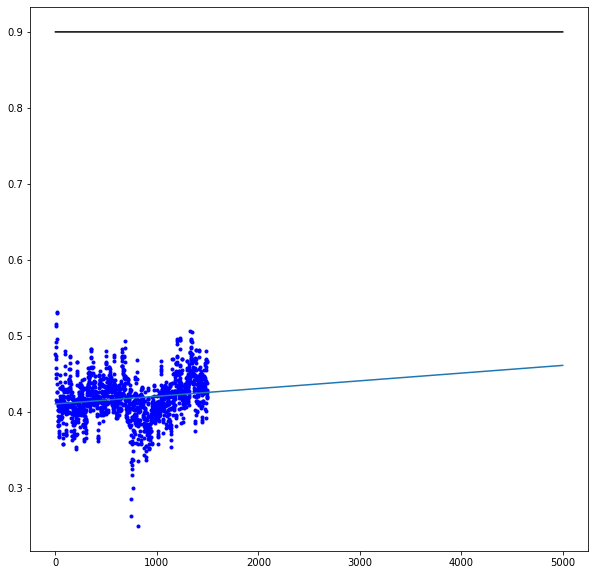

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
reg = LinearRegression().fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = reg.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test)
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

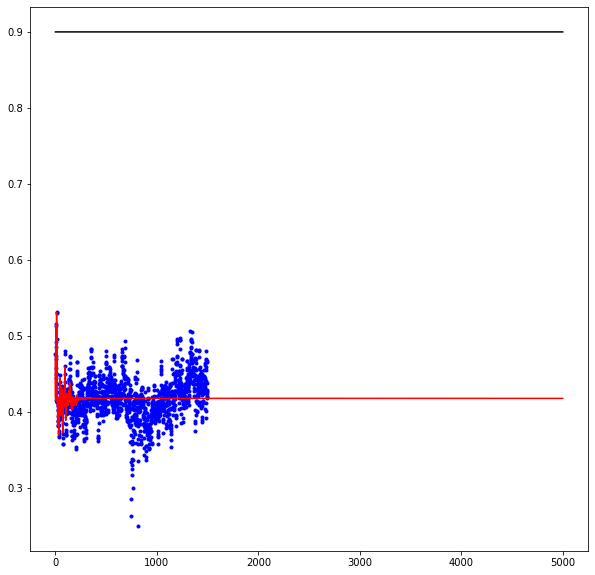

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
gp_kernel = RBF(0.01)+RationalQuadratic(0.1)

gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr.fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = gpr.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test, 'r')
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

#Bearing2_3

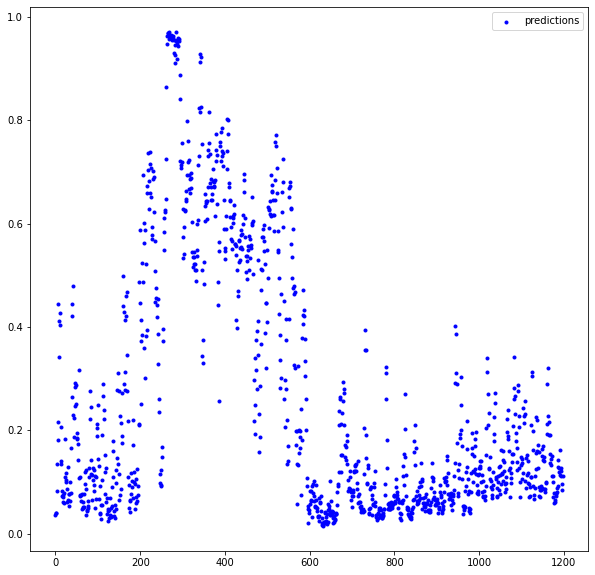

In [ ]:
test_pfile = test_pkzfiles_path+'bearing2_3_test_data.pkz'
test_dataset = PHMTestDataset_Sequential(dataset=test_pfile)

test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=1)

results = model_inference_helper(model, test_dataloader)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.legend()
plt.show()

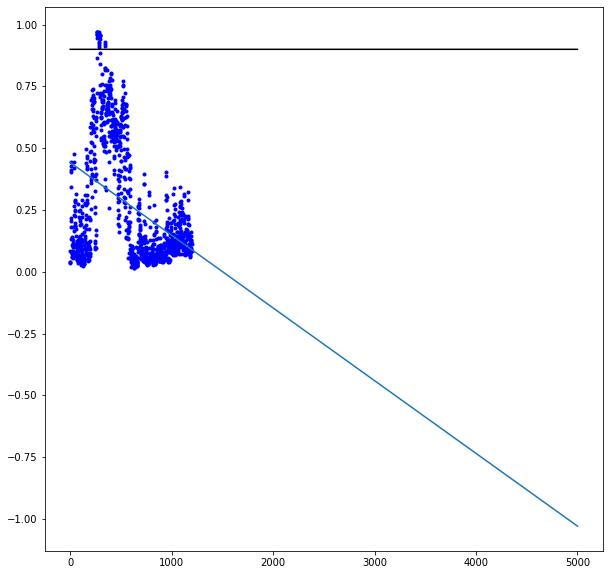

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
reg = LinearRegression().fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = reg.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test)
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

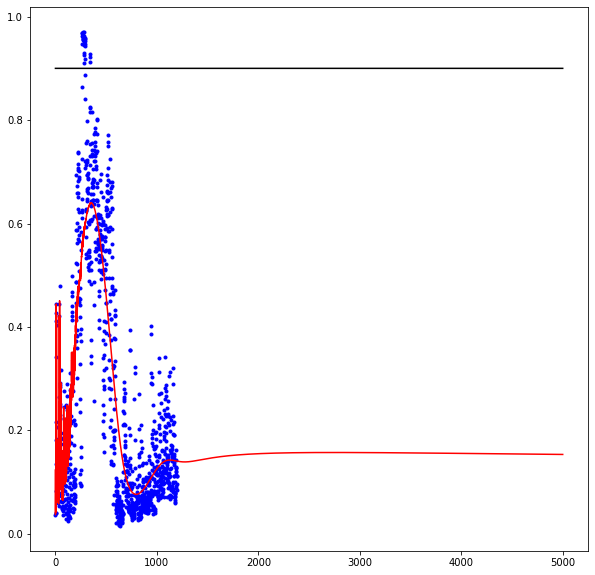

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
gp_kernel = RBF(0.01)+RationalQuadratic(0.1)

gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr.fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = gpr.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test, 'r')
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

#Bearing2_4


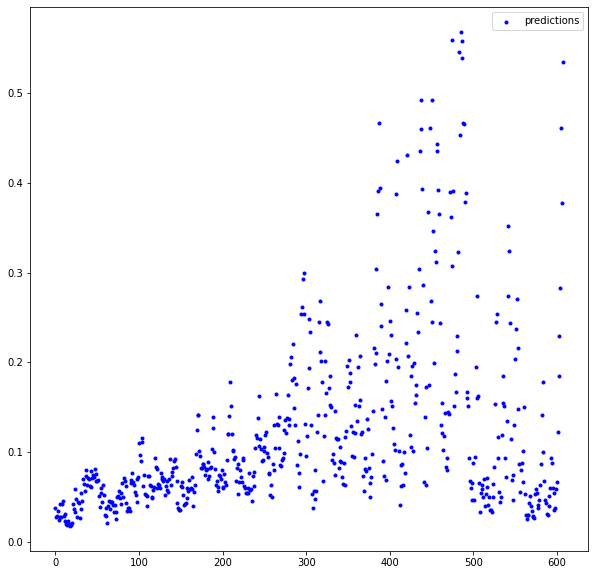

In [ ]:
test_pfile = test_pkzfiles_path+'bearing2_4_test_data.pkz'
test_dataset = PHMTestDataset_Sequential(dataset=test_pfile)

test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=1)

results = model_inference_helper(model, test_dataloader)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.legend()
plt.show()

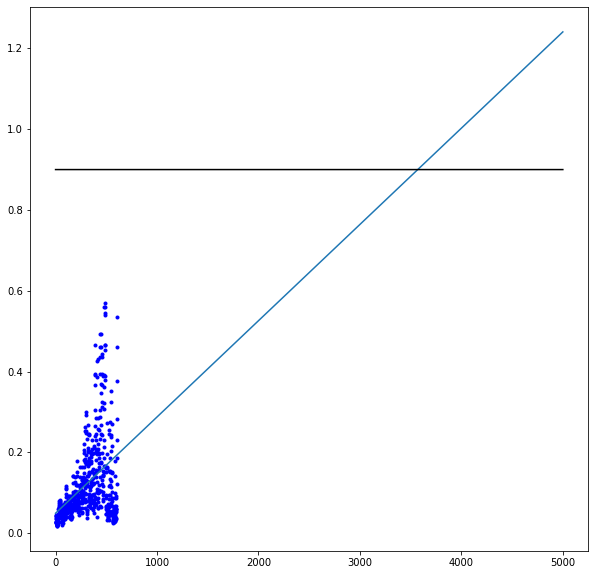

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
reg = LinearRegression().fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = reg.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test)
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

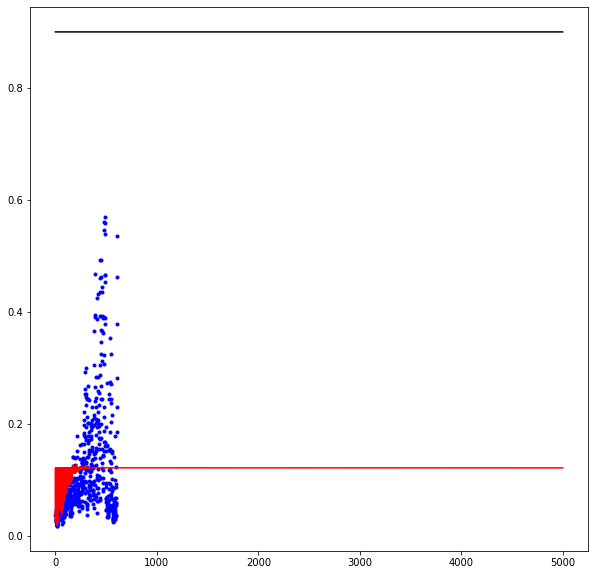

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
gp_kernel = RBF(0.01)+RationalQuadratic(0.1)

gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr.fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = gpr.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test, 'r')
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

#Bearing2_5

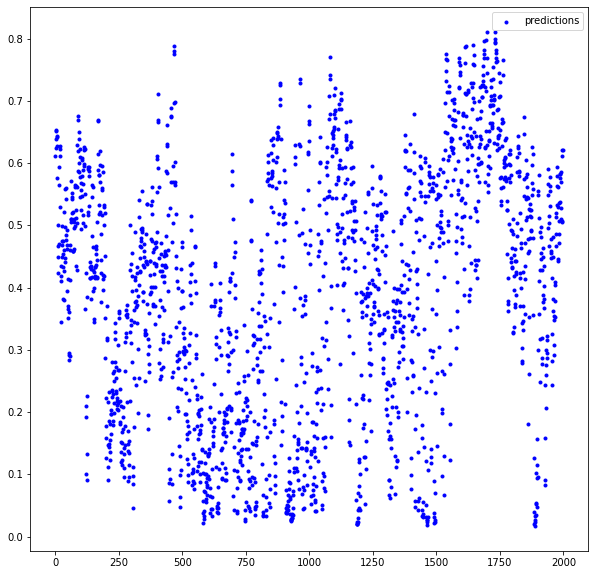

In [ ]:
test_pfile = test_pkzfiles_path+'bearing2_5_test_data.pkz'
test_dataset = PHMTestDataset_Sequential(dataset=test_pfile)

test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=1)

results = model_inference_helper(model, test_dataloader)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.legend()
plt.show()

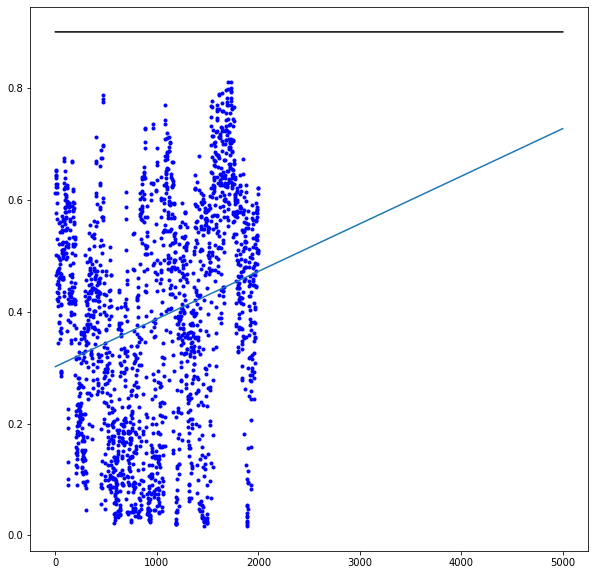

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
reg = LinearRegression().fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = reg.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test)
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

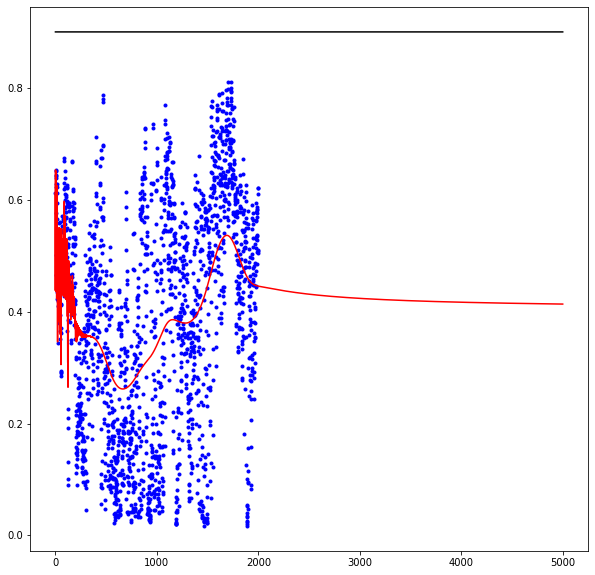

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
gp_kernel = RBF(0.01)+RationalQuadratic(0.1)

gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr.fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = gpr.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test, 'r')
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

#Bearing2_6

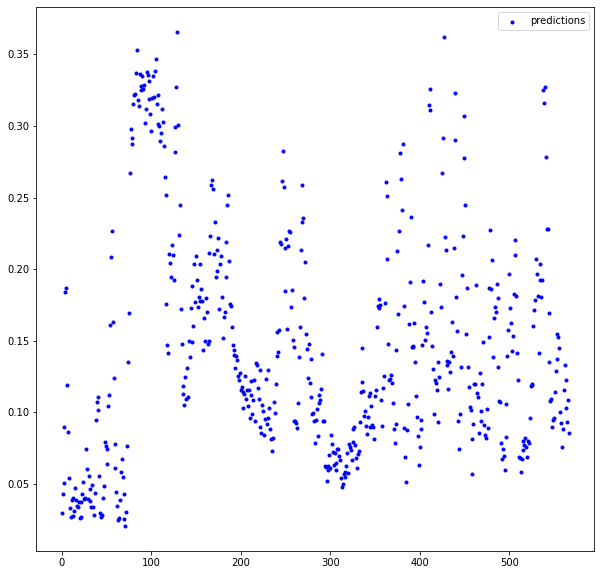

In [ ]:
test_pfile = test_pkzfiles_path+'bearing2_6_test_data.pkz'
test_dataset = PHMTestDataset_Sequential(dataset=test_pfile)

test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=1)

results = model_inference_helper(model, test_dataloader)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.legend()
plt.show()

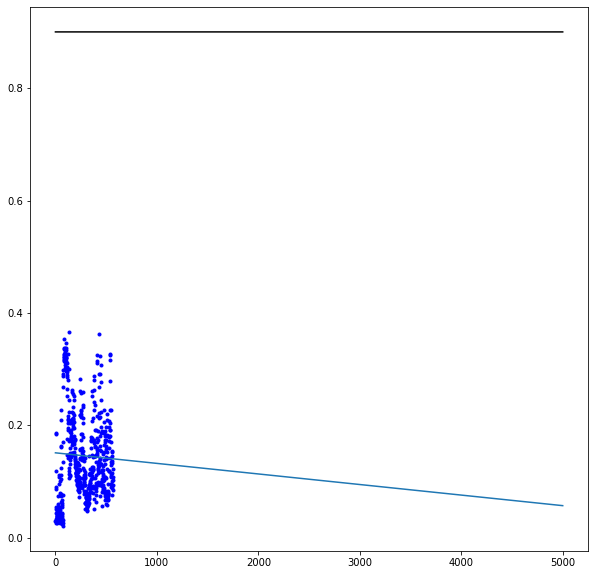

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
reg = LinearRegression().fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = reg.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test)
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

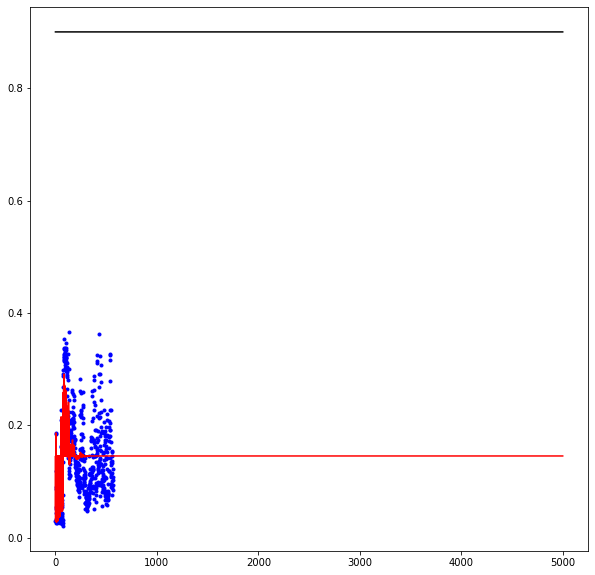

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
gp_kernel = RBF(0.01)+RationalQuadratic(0.1)

gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr.fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = gpr.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test, 'r')
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

#Bearing2_7



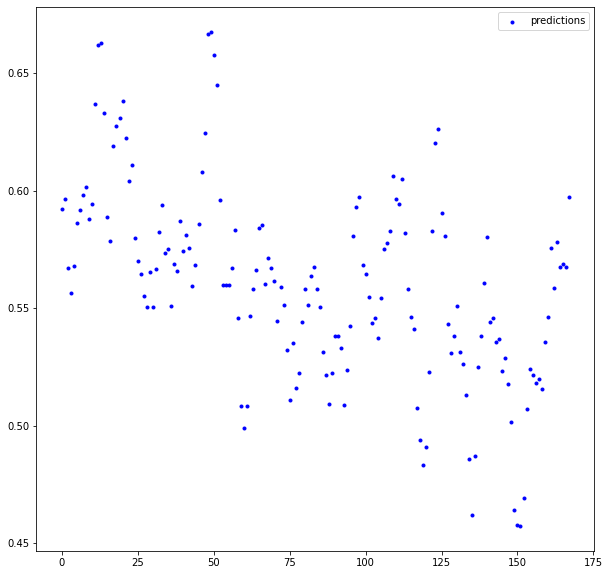

In [ ]:
test_pfile = test_pkzfiles_path+'bearing2_7_test_data.pkz'
test_dataset = PHMTestDataset_Sequential(dataset=test_pfile)

test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=1)

results = model_inference_helper(model, test_dataloader)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.legend()
plt.show()

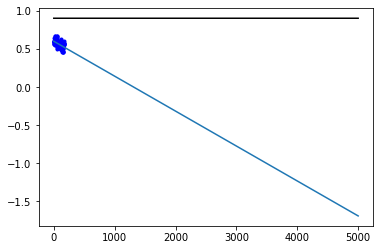

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
reg = LinearRegression().fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = reg.predict(X_test)
plt.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
plt.plot(X_test, y_test)
plt.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

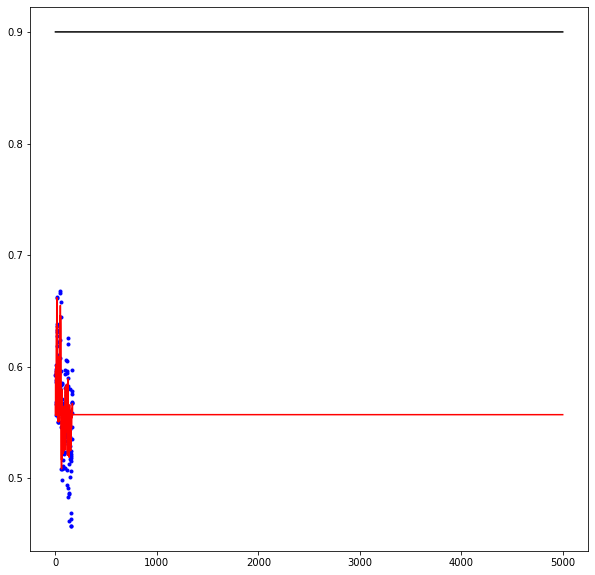

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
gp_kernel = RBF(0.01)+RationalQuadratic(0.1)

gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr.fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = gpr.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test, 'r')
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

#Bearing3_3

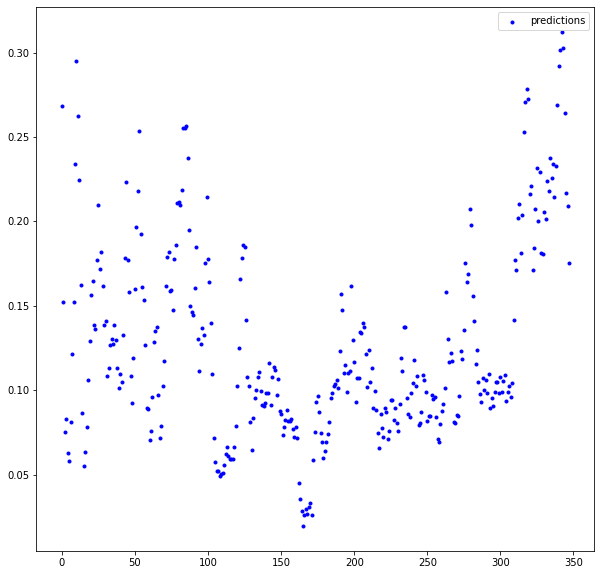

In [ ]:
test_pfile = test_pkzfiles_path+'bearing3_3_test_data.pkz'
test_dataset = PHMTestDataset_Sequential(dataset=test_pfile)

test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=1)

results = model_inference_helper(model, test_dataloader)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.legend()
plt.show()

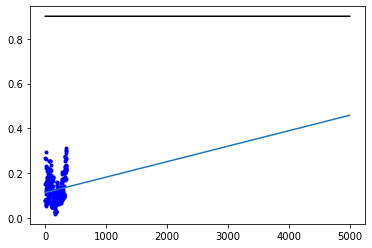

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
reg = LinearRegression().fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = reg.predict(X_test)
plt.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
plt.plot(X_test, y_test)
plt.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()

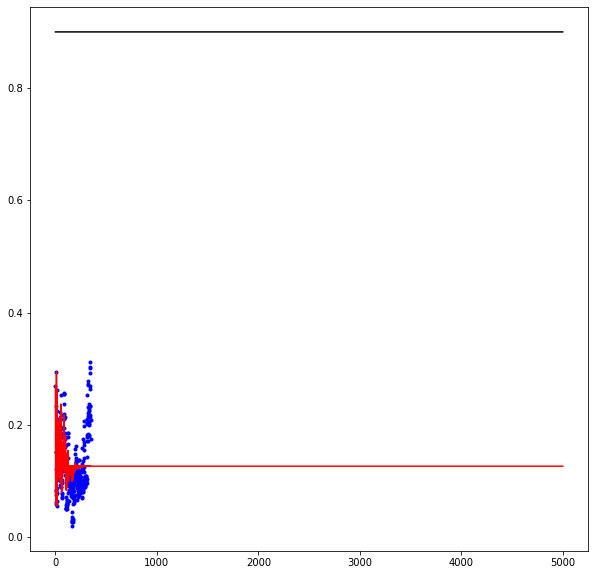

In [ ]:
X = np.arange(len(results['predictions'])).reshape(-1,1)
y = np.array(results['predictions']).reshape(-1, 1)
gp_kernel = RBF(0.01)+RationalQuadratic(0.1)

gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr.fit(X, y)

X_test = np.linspace(0, 5000, 10000).reshape(-1, 1)
y_test = gpr.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 10])
ax.scatter(range(len(results['predictions'])), results['predictions'], c='b', marker='.', label='predictions')
ax.plot(X_test, y_test, 'r')
ax.plot(X_test, [0.9]*len(X_test), 'k')
plt.show()